AVL tree is a self-balancing binary search tree in which each node maintains extra information called a balance factor whose value is either -1, 0 or +1.

AVL tree got its name after its inventor Georgy Adelson-Velsky and Landis.

### Balance Factor
Balance factor of a node in an AVL tree is the difference between the height of the left subtree and that of the right subtree of that node.

Balance Factor = (Height of Left Subtree - Height of Right Subtree) or (Height of Right Subtree - Height of Left Subtree)

The self balancing property of an avl tree is maintained by the balance factor. The value of balance factor should always be -1, 0 or +1.

An example of a balanced avl tree is:

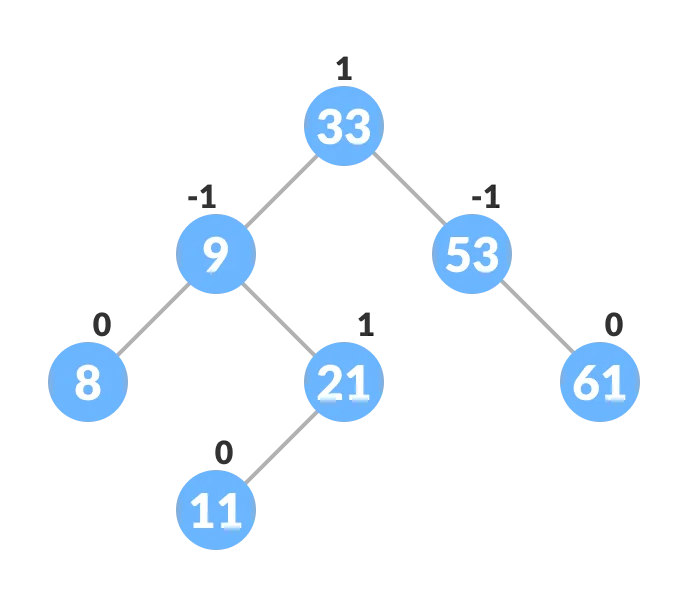

### Operations on an AVL tree
Various operations that can be performed on an AVL tree are:

### Rotating the subtrees in an AVL Tree
In rotation operation, the positions of the nodes of a subtree are interchanged.

### There are two types of rotations:

#### Left Rotate
In left-rotation, the arrangement of the nodes on the right is transformed into the arrangements on the left node.

Algorithm

    1. Let the initial tree be:
   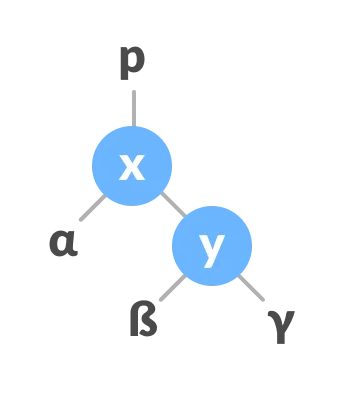
   
    2. If y has a left subtree, assign x as the parent of the left subtree of y
   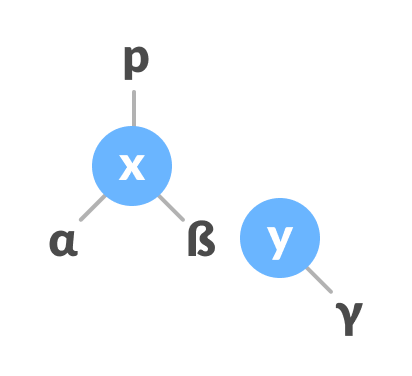
    
    3. If the parent of x is NULL, make y as the root of the tree.
    
    4. Else if x is the left child of p, make y as the left child of p.
    
    5. Else assign y as the right child of p.
   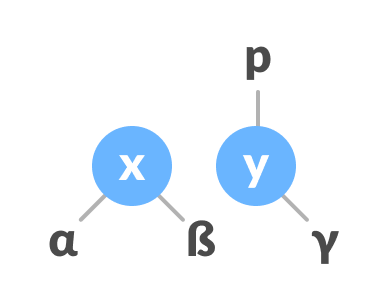
   
    6. Make y as the parent of x
   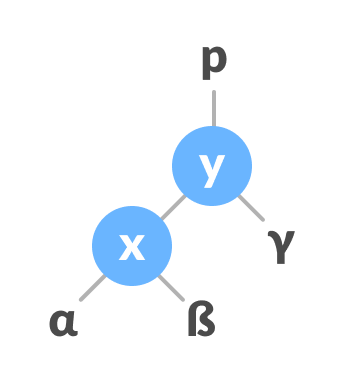


    

#### Right Rotate
In left-rotation, the arrangement of the nodes on the left is transformed into the arrangements on the right node.

    1. Let the initial tree be:
   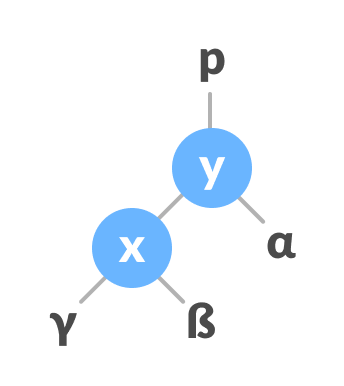

    2. If x has a right subtree, assign y as the parent of the right subtree of x
   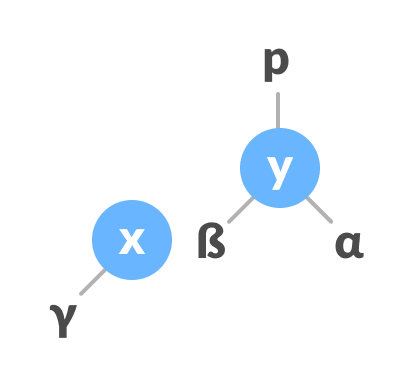

    3. If the parent of y is NULL, make x as the root of the tree.
    
    4. Else if y is the right child of its parent p, make x as the right child of p.
    
    5. Else assign x as the left child of p
    
   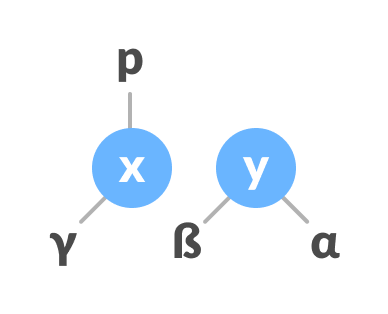

    6. Make x as the parent of y
   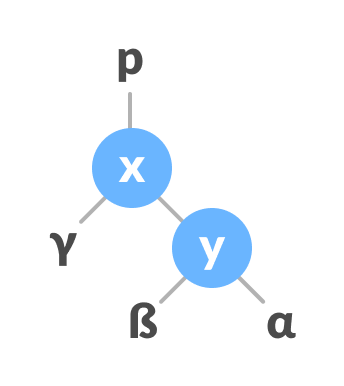



#### Left-Right and Right-Left Rotate
In left-right rotation, the arrangements are first shifted to the left and then to the right.

    1. Do left rotation on x-y.
   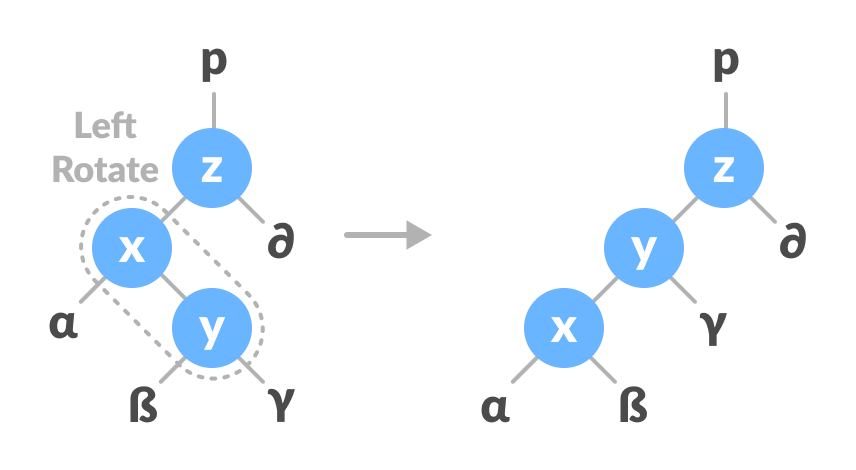
    2. Do right rotation on y-z.
   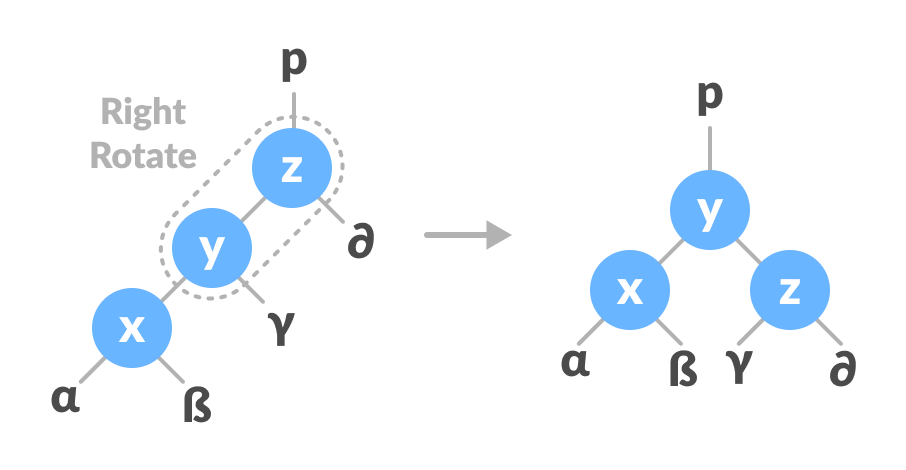
   
In right-left rotation, the arrangements are first shifted to the right and then to the left.

    1. Do right rotation on x-y.
   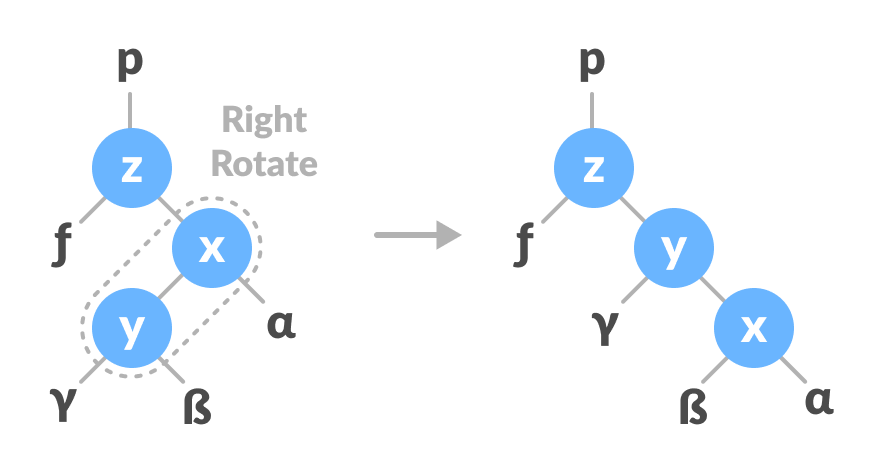
    
    2. Do left rotation on z-y.
   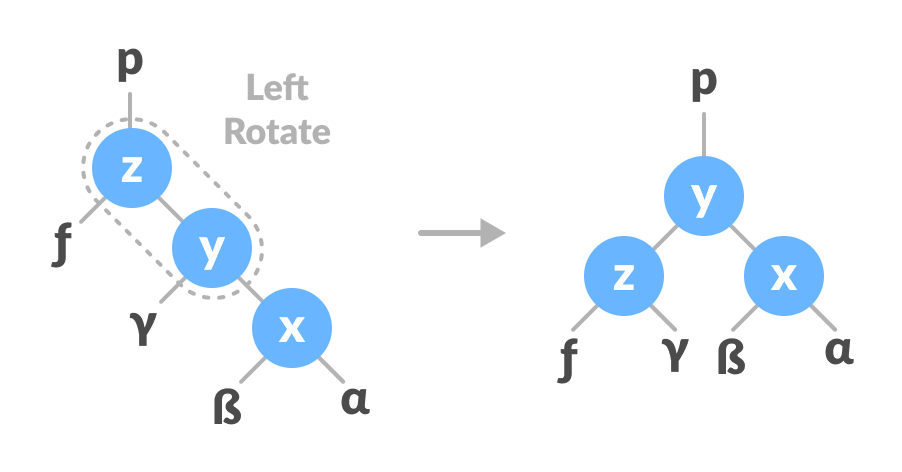
   
   

#### Algorithm to insert a newNode
A newNode is always inserted as a leaf node with balance factor equal to 0.

    1. Let the initial tree be:
   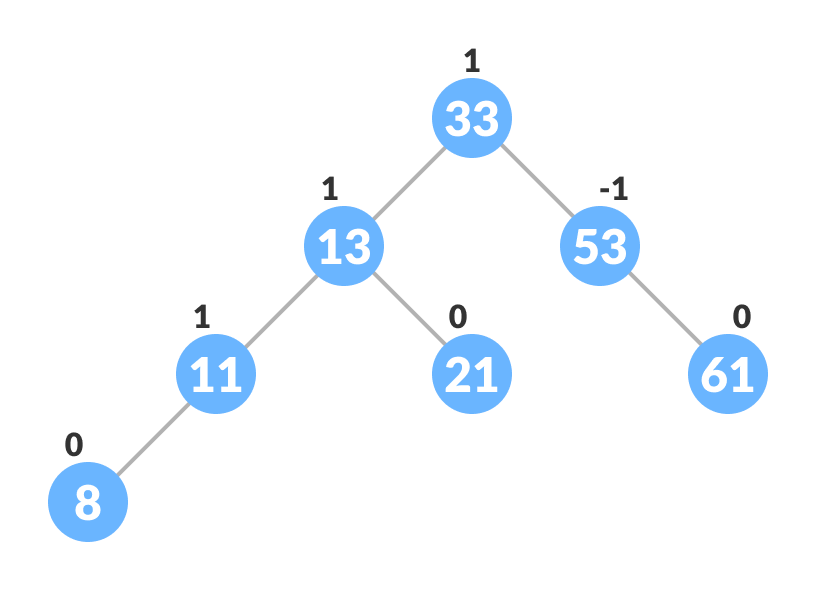

    Let the node to be inserted be:
   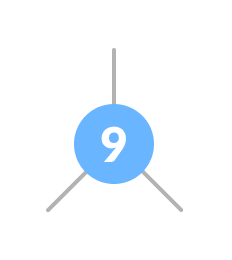
    
    2. Go to the appropriate leaf node to insert a newNode using the following recursive steps. Compare newKey with rootKey of the current tree.
    
    a. If newKey < rootKey, call insertion algorithm on the left subtree of the current node until the leaf node is reached.
    b. Else if newKey > rootKey, call insertion algorithm on the right subtree of current node until the leaf node is reached.
    c. Else, return leafNode.
    
   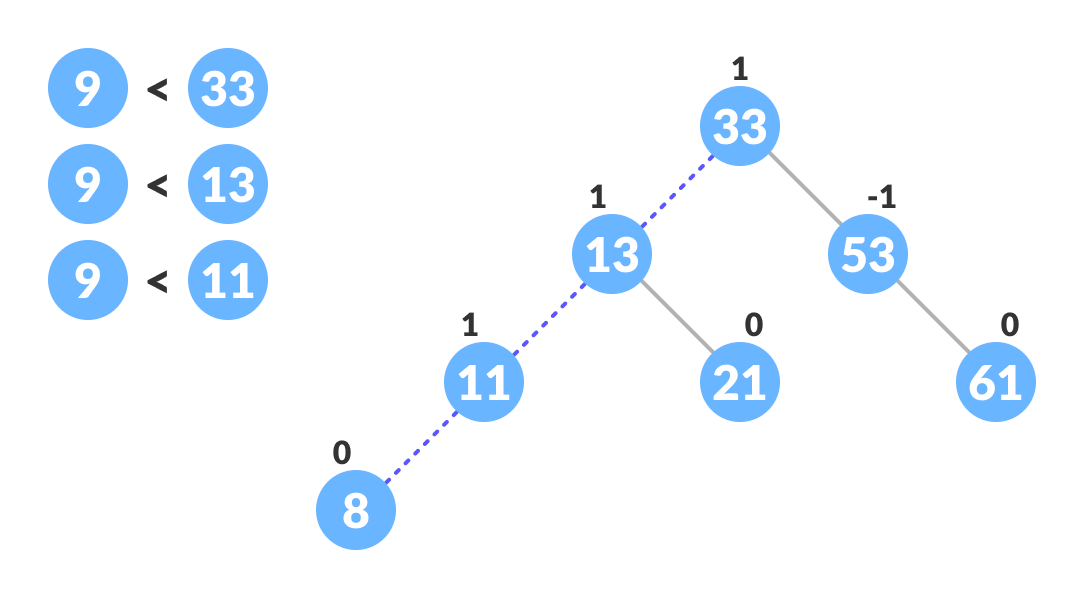

    3. Compare leafKey obtained from the above steps with newKey:
    a. If newKey < leafKey, make newNode as the leftChild of leafNode.
    b. Else, make newNode as rightChild of leafNode
    
   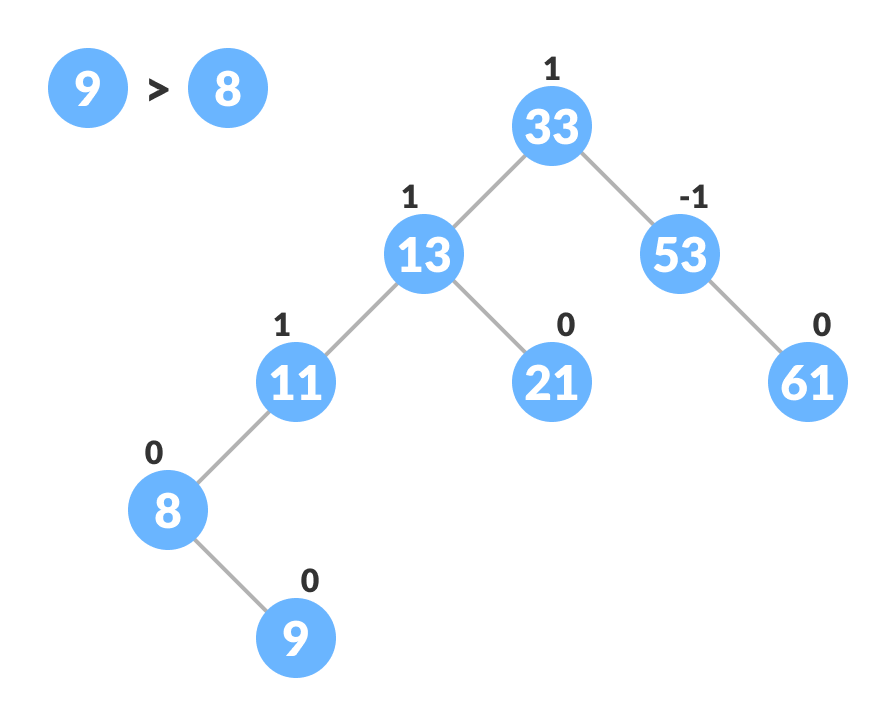
   
    4. Update balanceFactor of the nodes
    
   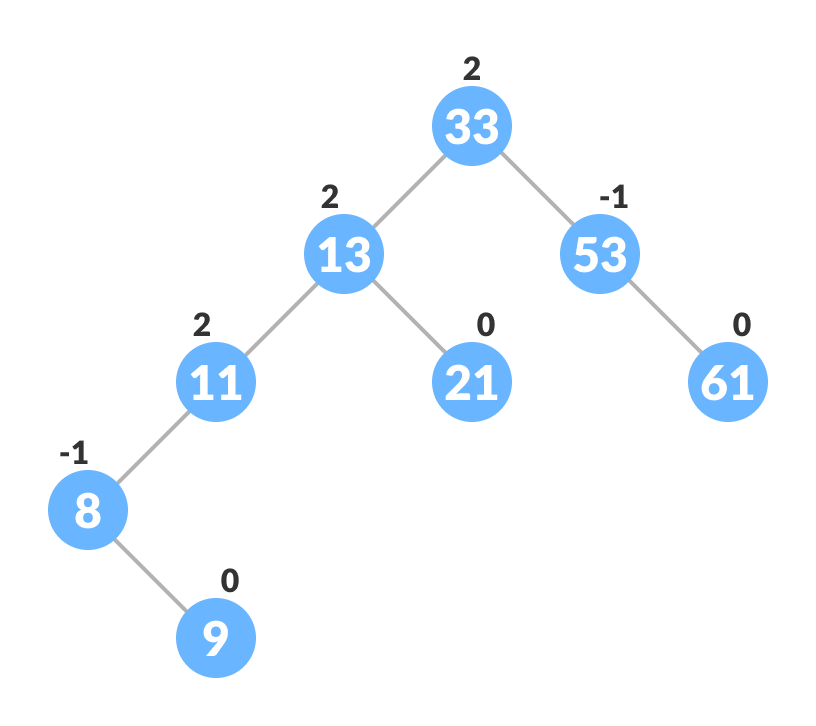
   
    5. If the nodes are unbalanced, then rebalance the node.
    
    a. If balanceFactor > 1, it means the height of the left subtree is greater than that of the right subtree. So, do a right rotation or left-right rotation
        a. If newNodeKey < leftChildKey do right rotation.
        b. Else, do left-right rotation.
        
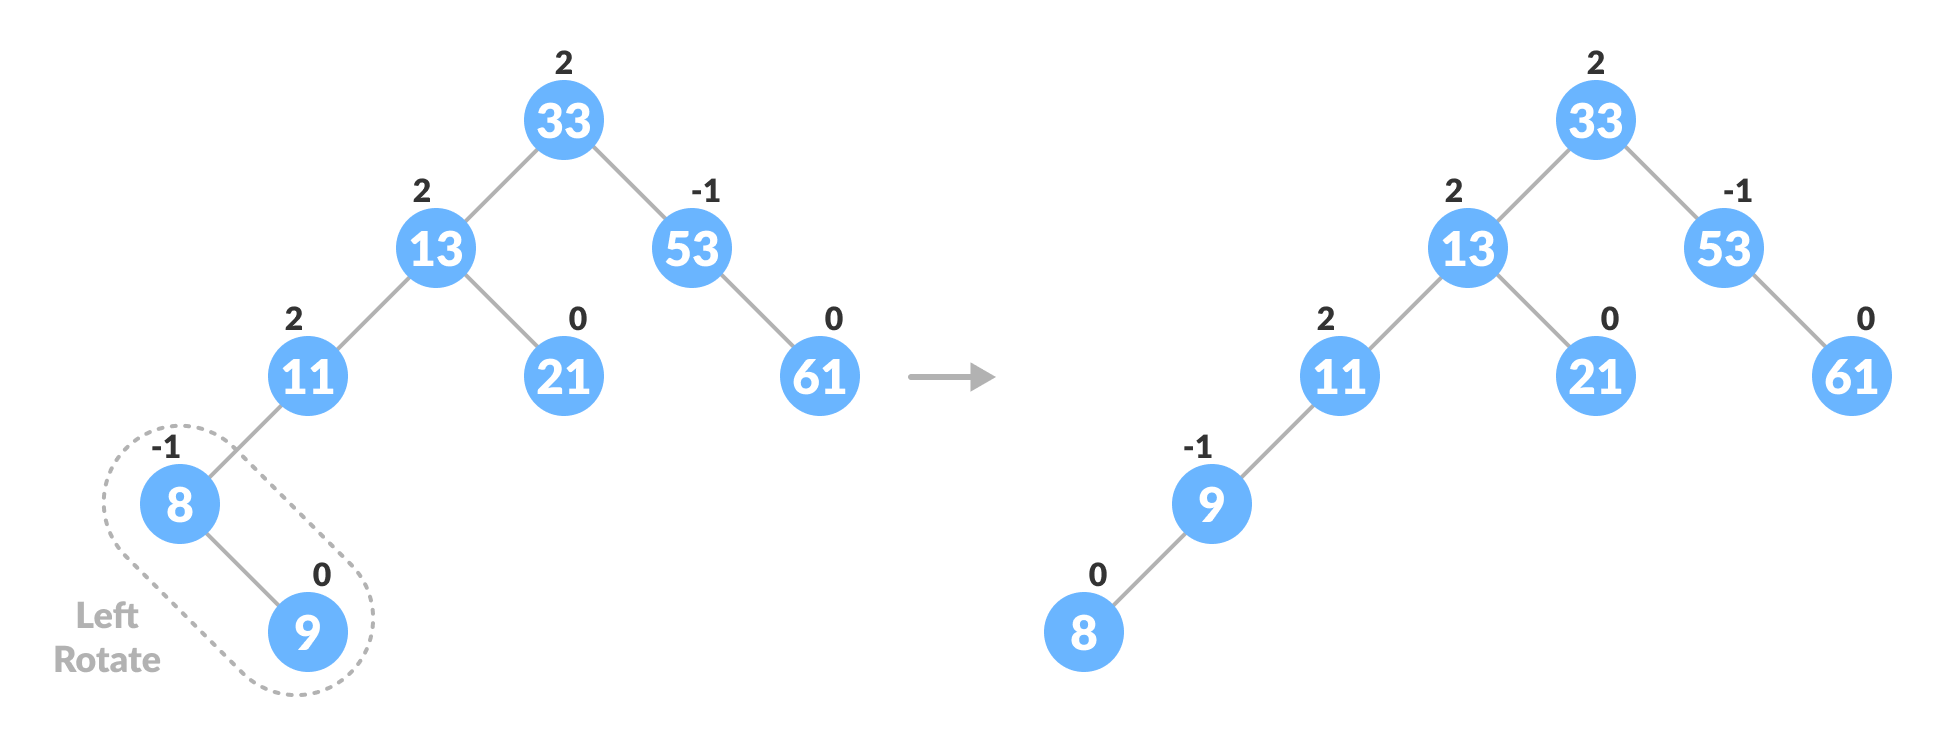
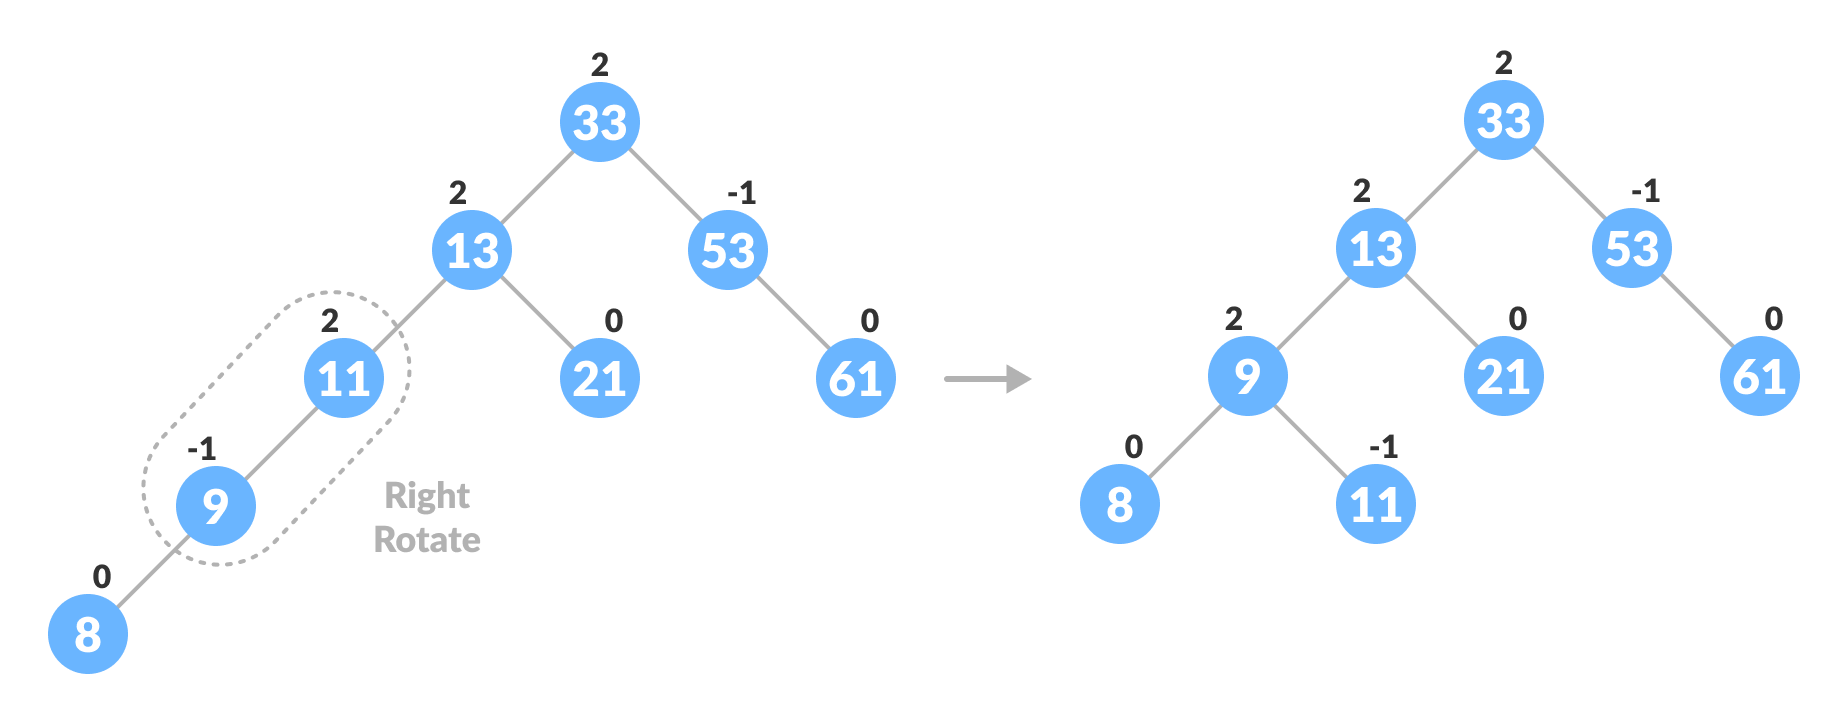
    
    b. If balanceFactor < -1, it means the height of the right subtree is greater than that of the left subtree. So, do right rotation or right-left rotation
        a. If newNodeKey > rightChildKey do left rotation.
        
        b. Else, do right-left rotation
        
    6. The final tree is:
    
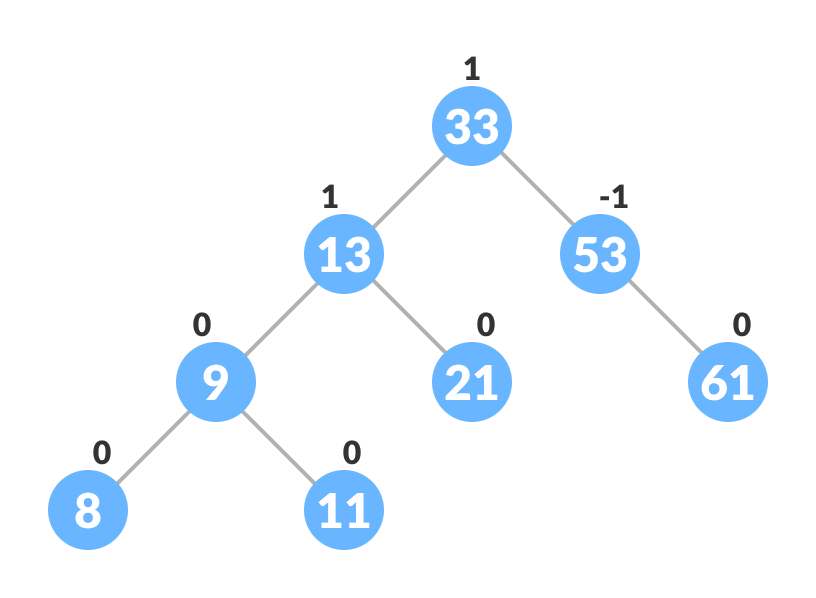



#### Algorithm to Delete a node
A node is always deleted as a leaf node. After deleting a node, the balance factors of the nodes get changed. In order to rebalance the balance factor, suitable rotations are performed.

    1. Locate nodeToBeDeleted (recursion is used to find nodeToBeDeleted in the code used below).
    
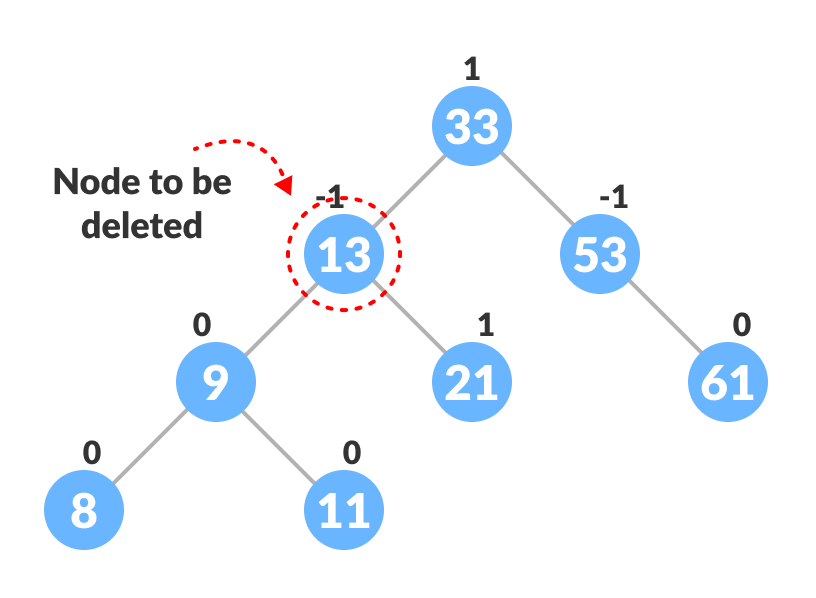

    2. There are three cases for deleting a node:
        
        a. If nodeToBeDeleted is the leaf node (ie. does not have any child), then remove nodeToBeDeleted.
        b. If nodeToBeDeleted has one child, then substitute the contents of nodeToBeDeleted with that of the child. Remove the child.
        c. If nodeToBeDeleted has two children, find the inorder successor w of nodeToBeDeleted (ie. node with a minimum value of key in the right subtree).
        
        
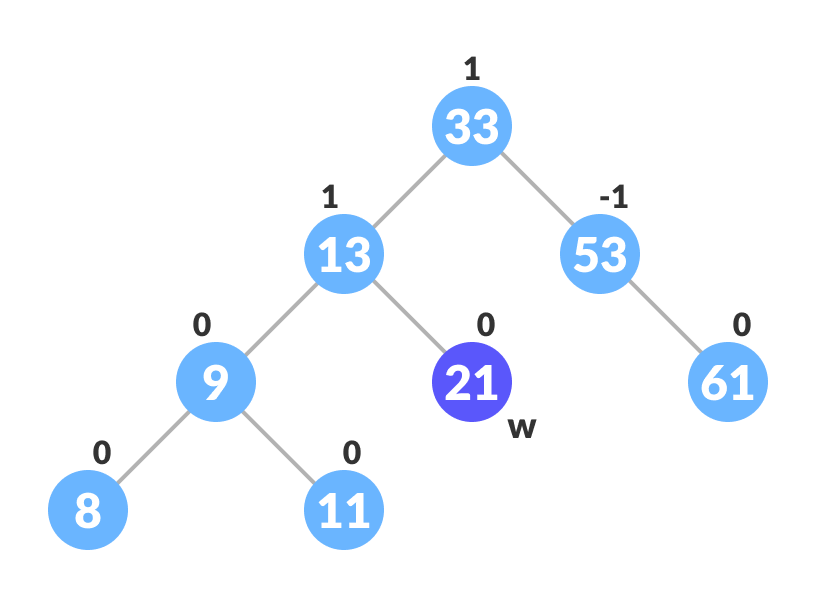

Substitute the contents of nodeToBeDeleted with that of w

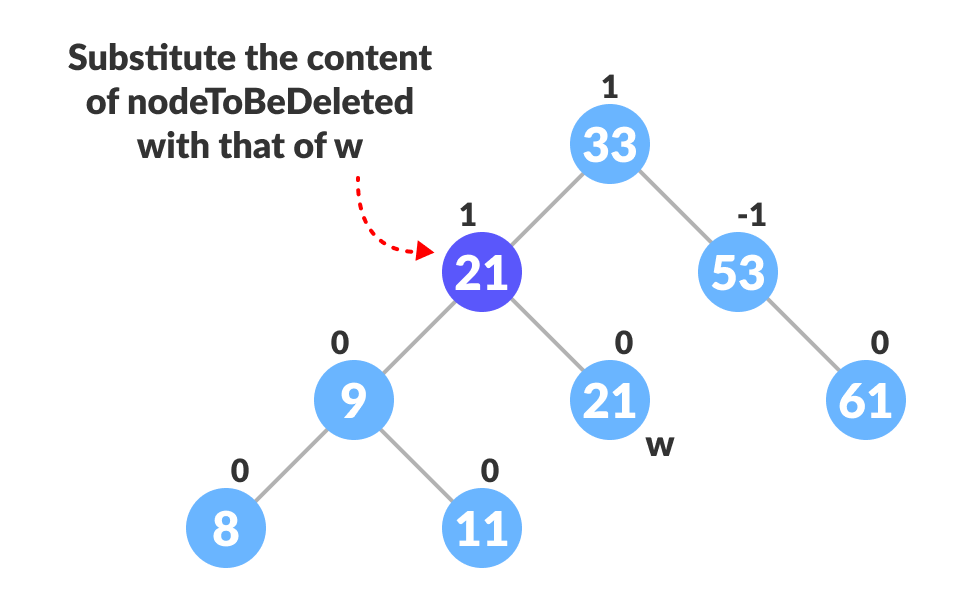

Remove the leaf node w

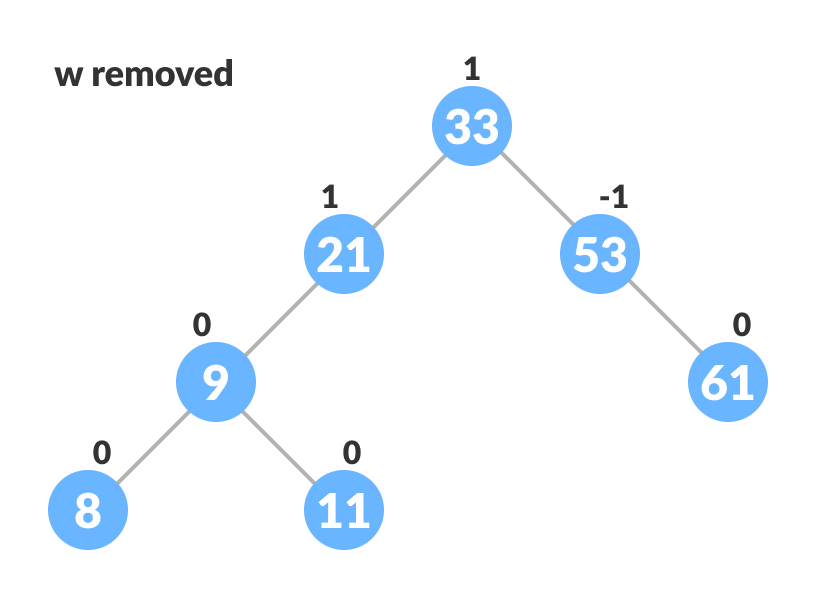

    3. Update balanceFactor of the nodes.
    
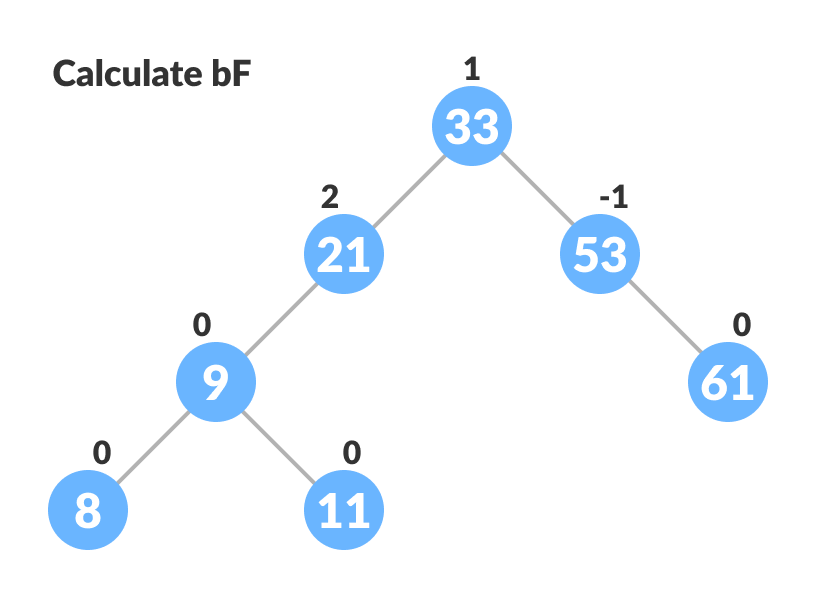

    4. Rebalance the tree if the balance factor of any of the nodes is not equal to -1, 0 or 1.
    
        a. If balanceFactor of currentNode > 1,
            a. If balanceFactor of leftChild >= 0, do right rotation.
            
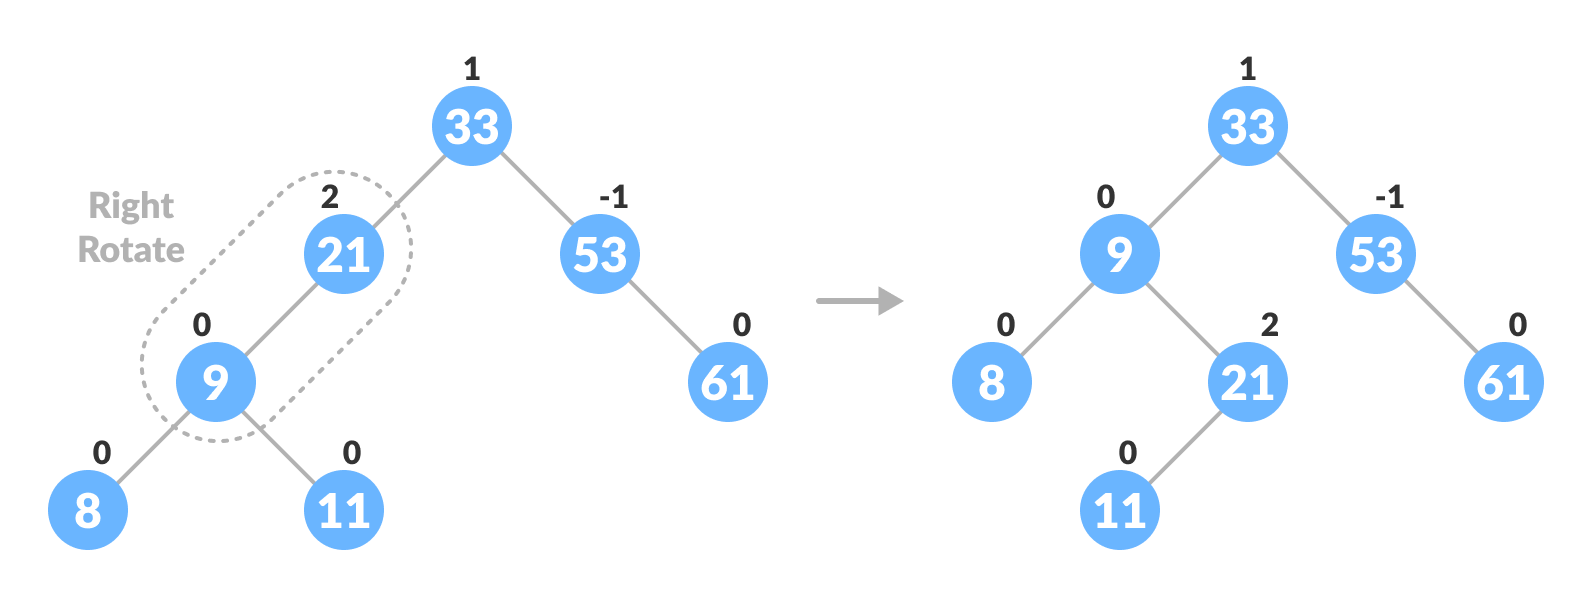

            b. Else do left-right rotation

        b. If balanceFactor of currentNode < -1,
            
            a. If balanceFactor of rightChild <= 0, do left rotation.
            
            b. Else do right-left rotation.

    5. The final tree is:
    
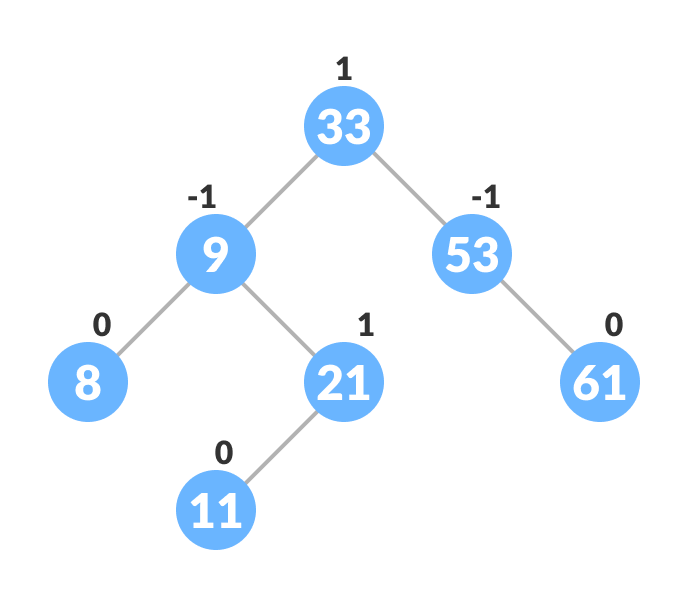



In [1]:
# AVL tree implementation in Python


import sys
# Create a tree node
class TreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1


class AVLTree(object):

    # Function to insert a node
    def insert_node(self, root, key):
        # Find the correct location and insert the node
        if not root:
            return TreeNode(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)

        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))
        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        return root

    # Function to delete a node
    def delete_node(self, root, key):
        # Find the node to be deleted and remove it
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,temp.key)
        if root is None:
            return root

        # Update the balance factor of nodes
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        balanceFactor = self.getBalance(root)

        # Balance the tree
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root

    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    def preOrder(self, root):
        if not root:
            return
        print("{0} ".format(root.key), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)

    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            print(currPtr.key)
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)


myTree = AVLTree()
root = None
nums = [33, 13, 52, 9, 21, 61, 8, 11]
for num in nums:
    root = myTree.insert_node(root, num)
myTree.printHelper(root, "", True)
key = 13
root = myTree.delete_node(root, key)
print("After Deletion: ")
myTree.printHelper(root, "", True)

R----33
     L----13
     |    L----9
     |    |    L----8
     |    |    R----11
     |    R----21
     R----52
          R----61
After Deletion: 
R----33
     L----9
     |    L----8
     |    R----21
     |         L----11
     R----52
          R----61
